In [486]:
#제발 되라 업데이트좀 해바ㅏㅏㅏㅏ
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

In [487]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic') 
plt.style.use("ggplot")
pd.set_option('mode.chained_assignment',  None)

In [488]:
#데이터 가져오기
traffic_2018_01=pd.read_csv('data/2018_01분기.csv',encoding='cp949')
traffic_2018_02=pd.read_csv('data/2018_02분기.csv',encoding='cp949')
traffic_2018_03=pd.read_csv('data/2018_03분기.csv',encoding='cp949')
traffic_2018_04=pd.read_csv('data/2018_04분기.csv',encoding='cp949')
traffic_2019_01=pd.read_csv('data/2019_01분기.csv',encoding='cp949')
traffic_2019_02=pd.read_csv('data/2019_02분기.csv',encoding='cp949')
traffic_2019_03=pd.read_csv('data/2019_03분기.csv',encoding='cp949')
traffic_2019_04=pd.read_csv('data/2019_04분기.csv',encoding='cp949')
traffic_2020_01=pd.read_csv('data/2020_01분기.csv',encoding='cp949')
traffic_2020_02=pd.read_csv('data/2020_02분기.csv',encoding='cp949')
traffic_2020_03=pd.read_csv('data/2020_03분기.csv',encoding='cp949')
traffic_2020_04=pd.read_csv('data/2020_04분기.csv',encoding='cp949')
traffic_2021_01=pd.read_csv('data/2021_01분기.csv',encoding='cp949')
traffic_2021_02=pd.read_csv('data/2021_02분기.csv',encoding='cp949')

In [489]:
#2분기 데이터 합치기
traffic_data=pd.concat([traffic_2018_02,traffic_2019_02,traffic_2020_02,traffic_2021_02])
traffic_data.head()

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,20180401,246,가락,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,193,5,7,22,29,7,263
1,20180401,246,가락,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,542,7,15,15,144,25,748
2,20180401,29,가락(개),0,입구,1,TCS,0,한국도로공사,1,개방식,2993,19,29,28,129,347,3545
3,20180401,29,가락(개),0,입구,2,hi-pass,0,한국도로공사,1,개방식,8698,35,89,21,432,491,9766
4,20180401,29,가락(개),1,출구,1,TCS,0,한국도로공사,1,개방식,3553,19,49,31,135,422,4209


In [490]:
#2분기데이터 칼럼추가
traffic_data.index=traffic_data.집계일자
traffic_data=traffic_data.drop('집계일자',axis=1)
traffic_data=traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]
traffic_data.index=pd.to_datetime(traffic_data.index, format='%Y%m%d')
traffic_data['year']=traffic_data.index.year 
traffic_data['month']=traffic_data.index.month
traffic_data.head()

,영업소명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month
집계일자,,,,,,,,,,
2018-04-01,가락,193,5,7,22,29,7,263,2018,4
2018-04-01,가락,542,7,15,15,144,25,748,2018,4
2018-04-01,가락(개),2993,19,29,28,129,347,3545,2018,4
2018-04-01,가락(개),8698,35,89,21,432,491,9766,2018,4
2018-04-01,가락(개),3553,19,49,31,135,422,4209,2018,4


In [491]:
# 2020 2분기중 5월로만 그룹화
may_traffic_data=traffic_data[(traffic_data['month']==5)&(traffic_data['year']==2020)]
may_traffic_data=may_traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()/(6.935460e+06)
may_traffic_data['year']=may_traffic_data.index.year
may_traffic_data['month']=may_traffic_data.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
may_traffic_data['day_of_week']=may_traffic_data.index.dayofweek
may_traffic_data.day_of_week=may_traffic_data.day_of_week.apply(lambda x : days[x])
may_traffic_data.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,
2020-05-01,0.955621,0.018704,0.021363,0.014813,0.015611,0.040540,1.066653,2020,5,FRI
2020-05-02,1.000000,0.014837,0.018595,0.011872,0.017734,0.040107,1.103145,2020,5,SAT
2020-05-03,0.855849,0.006997,0.012975,0.006215,0.005399,0.034197,0.921633,2020,5,SUN
2020-05-04,0.885235,0.027365,0.030290,0.025014,0.039644,0.044980,1.052528,2020,5,MON
2020-05-05,0.778792,0.017429,0.020559,0.016616,0.025193,0.033642,0.892231,2020,5,TUE


In [492]:
#may_traffic_data.describe()

In [493]:
# 2021 2분기중 5월로만 그룹화
lastmay_traffic_data=traffic_data[(traffic_data['month']==5)&(traffic_data['year']==2021)]
lastmay_traffic_data=lastmay_traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()/(7.160452e+06)
lastmay_traffic_data['year']=lastmay_traffic_data.index.year
lastmay_traffic_data['month']=lastmay_traffic_data.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
lastmay_traffic_data['day_of_week']=lastmay_traffic_data.index.dayofweek
lastmay_traffic_data.day_of_week=lastmay_traffic_data.day_of_week.apply(lambda x : days[x])
lastmay_traffic_data.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,
2021-05-01,0.876654,0.014430,0.019400,0.012241,0.016021,0.035950,0.974696,2021,5,SAT
2021-05-02,0.856370,0.007681,0.013986,0.006861,0.006599,0.034029,0.925527,2021,5,SUN
2021-05-03,0.841758,0.032650,0.038008,0.031922,0.048869,0.043529,1.036736,2021,5,MON
2021-05-04,0.835254,0.032601,0.039228,0.034168,0.050682,0.042789,1.034723,2021,5,TUE
2021-05-05,0.820242,0.018291,0.022196,0.017091,0.026270,0.033389,0.937481,2021,5,WED


In [494]:
#lastmay_traffic_data.describe()

In [495]:
covid_data=pd.read_csv('data/Covid_case.csv')
covid_data.head()

,Unnamed: 0,accDefRate,accExamCnt,accExamCompCnt,careCnt,clearCnt,createDt,deathCnt,decideCnt,examCnt,resutlNegCnt,seq,stateDt,stateTime,updateDt,Unnamed: 15
0,0,2.255638,14285339.0,13229116.0,29546.0,266414.0,2021-09-25 10:49:15.225,2441.0,298401,1056223.0,12930715.0,646.0,20210925,00:00,2021-09-26 10:29:10.433,3269
1,1,2.237343,14221685.0,13191185.0,28206.0,264492.0,2021-09-24 09:53:29.116,2434.0,295132,1030500.0,12896053.0,645.0,20210924,00:00,NaN,2433
2,2,2.231558,14151069.0,13116349.0,27430.0,262842.0,2021-09-23 10:01:14.491,2427.0,292699,1034720.0,12823650.0,644.0,20210923,00:00,NaN,1716
3,3,2.218799,14112435.0,13114439.0,26752.0,261812.0,2021-09-22 09:35:53.93,2419.0,290983,997996.0,12823456.0,643.0,20210922,00:00,NaN,1720
4,4,2.205520,14081284.0,13115409.0,26760.0,260090.0,2021-09-21 09:39:49.437,2413.0,289263,965875.0,12826146.0,642.0,20210921,00:00,NaN,1729


In [496]:
# 코로나 일별 확진자 수 칼럼 추가
# 정수형 stateDt를 Datetime형 stateDt로 변환 후 인덱스로 설정

covid_data['daily_decideCnt']=(covid_data.decideCnt.shift()-covid_data.decideCnt)/79
covid_data_new=covid_data[['stateDt','daily_decideCnt']]
covid_data_new.index=pd.to_datetime(covid_data_new['stateDt'],format='%Y%m%d')
covid_data_new=covid_data_new.drop('stateDt',axis=1)
covid_data_new['year']=covid_data_new.index.year
covid_data_new['month']=covid_data_new.index.month
covid_data_new=covid_data_new[(covid_data_new['month']==5)]
covid_data_new=covid_data_new[(covid_data_new['year']==2020)]
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
covid_data_new['day_of_week']=covid_data_new.index.dayofweek
covid_data_new.day_of_week=covid_data_new.day_of_week.apply(lambda x : days[x])
covid_data_new.head()

,daily_decideCnt,year,month,day_of_week
stateDt,,,,
2020-05-31,0.443038,2020,5,SUN
2020-05-30,0.341772,2020,5,SAT
2020-05-29,0.493671,2020,5,FRI
2020-05-28,0.734177,2020,5,THU
2020-05-27,1.000000,2020,5,WED


In [497]:
# 코로나 일별 확진자 수 칼럼 추가
# 정수형 stateDt를 Datetime형 stateDt로 변환 후 인덱스로 설정

covid_data['daily_decideCnt']=(covid_data.decideCnt.shift()-covid_data.decideCnt)/747
covid_data_n=covid_data[['stateDt','daily_decideCnt']]
covid_data_n.index=pd.to_datetime(covid_data_n['stateDt'],format='%Y%m%d')
covid_data_n=covid_data_n.drop('stateDt',axis=1)
covid_data_n['year']=covid_data_n.index.year
covid_data_n['month']=covid_data_n.index.month
covid_data_n=covid_data_n[(covid_data_n['month']==5)]
covid_data_n=covid_data_n[(covid_data_n['year']==2021)]
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
covid_data_n['day_of_week']=covid_data_n.index.dayofweek
covid_data_n.day_of_week=covid_data_n.day_of_week.apply(lambda x : days[x])
covid_data_n.head()

,daily_decideCnt,year,month,day_of_week
stateDt,,,,
2021-05-31,0.614458,2021,5,MON
2021-05-30,0.575636,2021,5,SUN
2021-05-29,0.642570,2021,5,SAT
2021-05-28,0.713521,2021,5,FRI
2021-05-27,0.785810,2021,5,THU


In [498]:
# 일별 확진자수 분포 확인

#covid_data_n.describe().daily_decideCnt

In [499]:
#covid_data_new.describe().daily_decideCnt

<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Saturday of May(2020)\n"}, xlabel='집계일자', ylabel='1종교통량'>

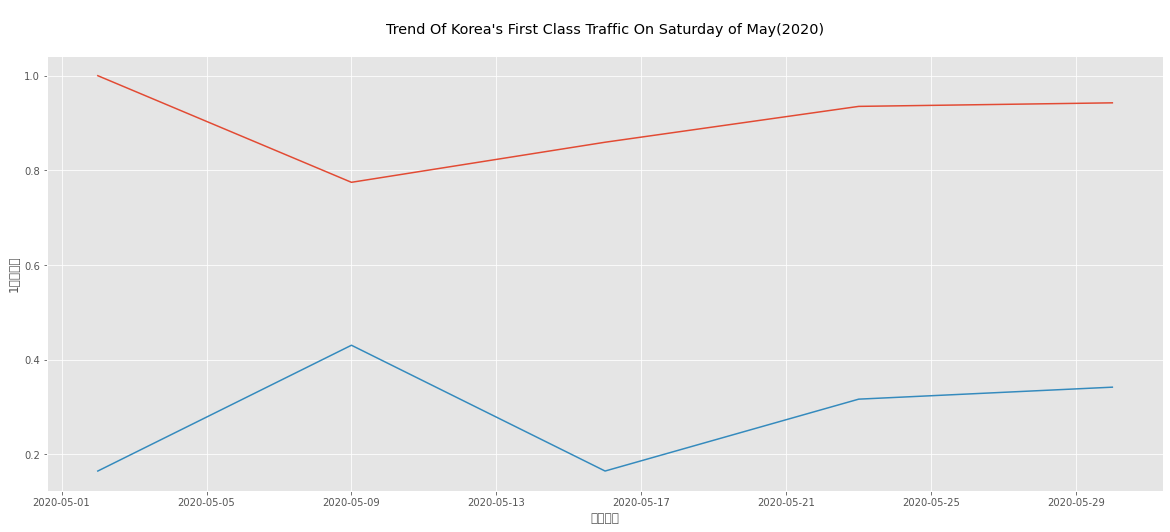

In [500]:
# 1종 교통량(대부분의 자가용) 5월 토요일 분석
#주황색이 교통량, 파란색이 코로나
plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Saturday of May(2020)\n')
sns.lineplot(data=may_traffic_data[(may_traffic_data.day_of_week=='SAT')], x='집계일자', y='1종교통량')
sns.lineplot(data=covid_data_new[(covid_data_new.day_of_week=='SAT')&((covid_data_new.year==2020))], x='stateDt', y='daily_decideCnt')


<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Saturday of May(2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

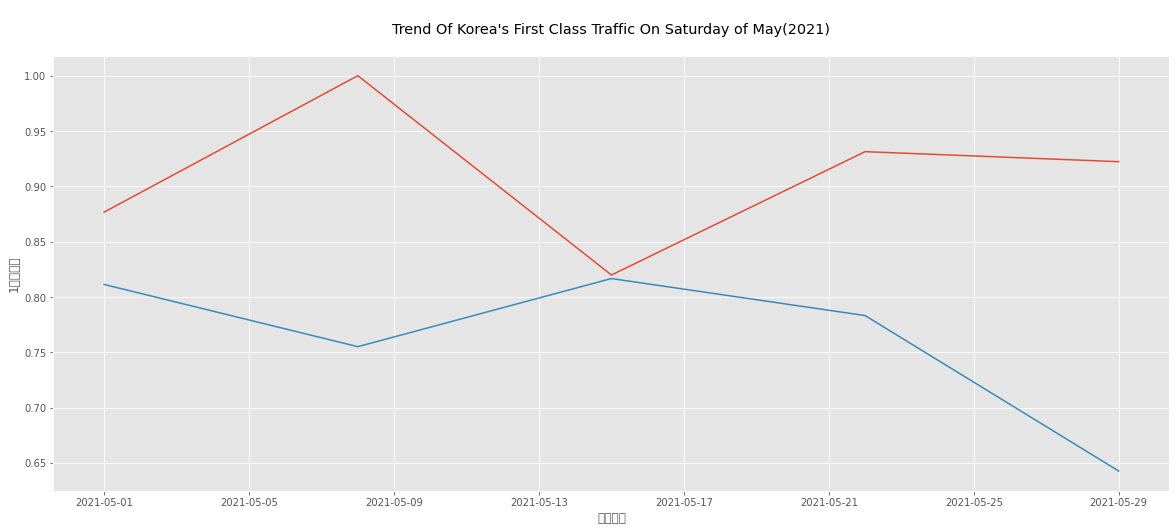

In [501]:
plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Saturday of May(2021)\n')
sns.lineplot(data=lastmay_traffic_data[(lastmay_traffic_data.day_of_week=='SAT')], x='집계일자', y='1종교통량')
sns.lineplot(data=covid_data_n[(covid_data_n.day_of_week=='SAT')&((covid_data_n.year==2021))], x='stateDt', y='daily_decideCnt')

<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Sunday of May(2020)\n"}, xlabel='집계일자', ylabel='1종교통량'>

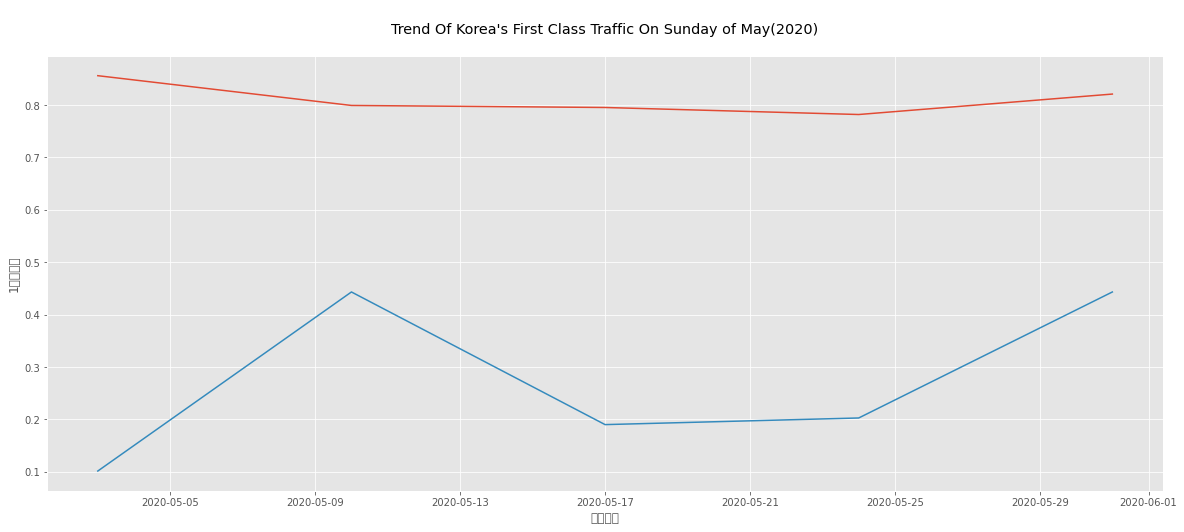

In [502]:
# 1종 교통량(대부분의 자가용) 5월 일요일 분석
#주황색이 교통량, 파란색이 코로나
plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Sunday of May(2020)\n')
sns.lineplot(data=may_traffic_data[(may_traffic_data.day_of_week=='SUN')], x='집계일자', y='1종교통량')
sns.lineplot(data=covid_data_new[(covid_data_new.day_of_week=='SUN')&((covid_data_new.year==2020))], x='stateDt', y='daily_decideCnt')


<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Sunday of May(2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

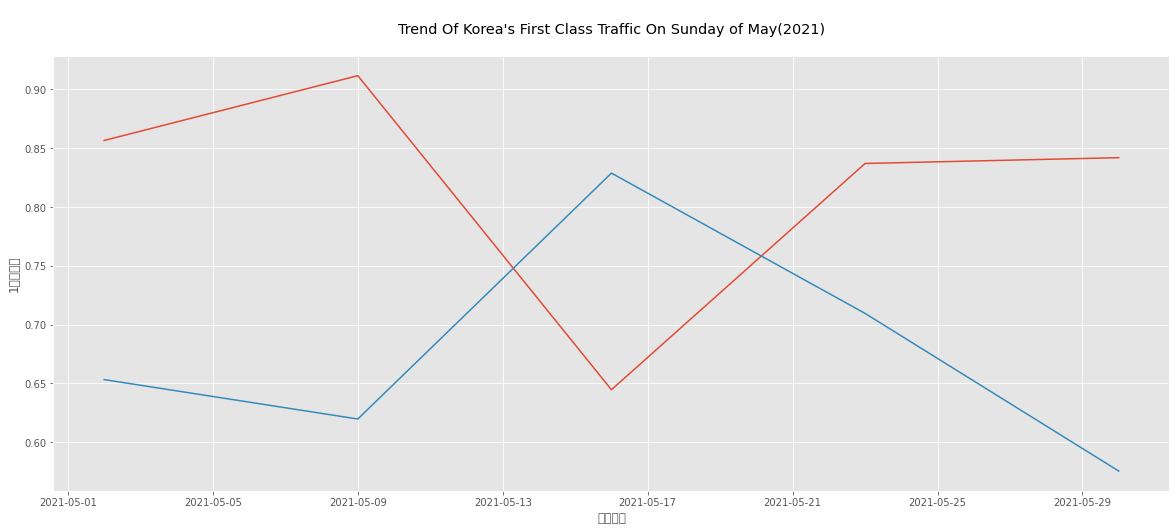

In [503]:
#주황색이 교통량, 파란색이 코로나
plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Sunday of May(2021)\n')
sns.lineplot(data=lastmay_traffic_data[(lastmay_traffic_data.day_of_week=='SUN')], x='집계일자', y='1종교통량')
sns.lineplot(data=covid_data_n[(covid_data_n.day_of_week=='SUN')&((covid_data_n.year==2021))], x='stateDt', y='daily_decideCnt')

In [504]:
#아래부터는 설날

In [505]:
#1분기 데이터 합치기
fitst_traffic_data=pd.concat([traffic_2020_01,traffic_2021_01])
fitst_traffic_data.head()

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,20200101,246,가락,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,147,2,3,13,8,9,182
1,20200101,246,가락,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,311,2,9,16,74,8,420
2,20200101,29,가락(개),0,입구,1,TCS,0,한국도로공사,1,개방식,1769,20,40,49,120,260,2258
3,20200101,29,가락(개),0,입구,2,hi-pass,0,한국도로공사,1,개방식,8312,26,72,40,499,444,9393
4,20200101,29,가락(개),1,출구,1,TCS,0,한국도로공사,1,개방식,2383,33,40,46,141,322,2965


In [506]:
#1분기데이터 칼럼추가
fitst_traffic_data.index=fitst_traffic_data.집계일자
fitst_traffic_data=fitst_traffic_data.drop('집계일자',axis=1)
fitst_traffic_data=fitst_traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]
fitst_traffic_data.index=pd.to_datetime(fitst_traffic_data.index, format='%Y%m%d')
fitst_traffic_data['year']=fitst_traffic_data.index.year 
fitst_traffic_data['month']=fitst_traffic_data.index.month
fitst_traffic_data.head()

,영업소명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month
집계일자,,,,,,,,,,
2020-01-01,가락,147,2,3,13,8,9,182,2020,1
2020-01-01,가락,311,2,9,16,74,8,420,2020,1
2020-01-01,가락(개),1769,20,40,49,120,260,2258,2020,1
2020-01-01,가락(개),8312,26,72,40,499,444,9393,2020,1
2020-01-01,가락(개),2383,33,40,46,141,322,2965,2020,1


In [507]:
# 2021 1분기중 1월로만 그룹화
jan_traffic_data=fitst_traffic_data[(fitst_traffic_data['year']==2021)&(fitst_traffic_data['month']==1)]
jan_traffic_data=jan_traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()/(5.691220e+06)
jan_traffic_data['year']=jan_traffic_data.index.year
jan_traffic_data['month']=jan_traffic_data.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
jan_traffic_data['day_of_week']=jan_traffic_data.index.dayofweek
jan_traffic_data.day_of_week=jan_traffic_data.day_of_week.apply(lambda x : days[x])
jan_traffic_data.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,
2021-01-01,0.735260,0.012763,0.018119,0.011001,0.009212,0.030090,0.816446,2021,1,FRI
2021-01-02,0.802033,0.015176,0.020166,0.011540,0.014465,0.034260,0.897641,2021,1,SAT
2021-01-03,0.726511,0.008409,0.015943,0.009004,0.007977,0.031782,0.799626,2021,1,SUN
2021-01-04,0.868189,0.036668,0.043541,0.037274,0.054478,0.048749,1.088899,2021,1,MON
2021-01-05,0.856389,0.040266,0.046900,0.043832,0.061581,0.048008,1.096976,2021,1,TUE


In [508]:
# 2020 1분기중 2월로만 그룹화

feb_traffic_data=fitst_traffic_data[(fitst_traffic_data['year']==2020)&(fitst_traffic_data['month']==2)]
feb_traffic_data=feb_traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()/(5.877788e+06)
feb_traffic_data['year']=feb_traffic_data.index.year
feb_traffic_data['month']=feb_traffic_data.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
feb_traffic_data['day_of_week']=feb_traffic_data.index.dayofweek
feb_traffic_data.day_of_week=feb_traffic_data.day_of_week.apply(lambda x : days[x])
feb_traffic_data.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,
2020-02-01,0.873712,0.019559,0.031881,0.017592,0.027420,0.042296,1.012459,2020,2,SAT
2020-02-02,0.727833,0.008686,0.023428,0.007392,0.007229,0.034225,0.808793,2020,2,SUN
2020-02-03,0.872021,0.036686,0.047829,0.035328,0.050891,0.050681,1.093436,2020,2,MON
2020-02-04,0.851268,0.038354,0.049710,0.039311,0.054722,0.049431,1.082795,2020,2,TUE
2020-02-05,0.830574,0.036885,0.048324,0.036217,0.052024,0.048338,1.052362,2020,2,WED


In [509]:
# 2021 1분기중 2월로만 그룹화

lastfeb_traffic_data=fitst_traffic_data[(fitst_traffic_data['year']==2021)&(fitst_traffic_data['month']==2)]
lastfeb_traffic_data=lastfeb_traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()/(6.639591e+06)
lastfeb_traffic_data['year']=lastfeb_traffic_data.index.year
lastfeb_traffic_data['month']=lastfeb_traffic_data.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
lastfeb_traffic_data['day_of_week']=lastfeb_traffic_data.index.dayofweek
lastfeb_traffic_data.day_of_week=lastfeb_traffic_data.day_of_week.apply(lambda x : days[x])
lastfeb_traffic_data.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,
2021-02-01,0.780393,0.032268,0.037997,0.032387,0.045009,0.043072,0.971127,2021,2,MON
2021-02-02,0.786890,0.035401,0.040843,0.038070,0.051677,0.042959,0.995841,2021,2,TUE
2021-02-03,0.781969,0.034858,0.040817,0.038502,0.052838,0.042151,0.991135,2021,2,WED
2021-02-04,0.752439,0.033535,0.039756,0.036923,0.050278,0.040003,0.952934,2021,2,THU
2021-02-05,0.881208,0.035219,0.041369,0.037873,0.053373,0.046230,1.095271,2021,2,FRI


In [510]:
#2021 1월 1종 교통량 최대값 찾기
#jan_traffic_data.describe()

In [511]:
#2020 2월 1종 교통량 최대값 찾기
#feb_traffic_data.describe()

In [512]:
#2021 2월 1종 교통량 최대값 찾기
#lastfeb_traffic_data.describe()

In [513]:
#2021 1월 코로나 확진자 데이터 가져오기
covid_data['daily_decideCnt']=((covid_data.decideCnt.shift()-covid_data.decideCnt))/1020
jan_covid_data_new=covid_data[['stateDt','daily_decideCnt']]
jan_covid_data_new.index=pd.to_datetime(jan_covid_data_new['stateDt'],format='%Y%m%d')
jan_covid_data_new=jan_covid_data_new.drop('stateDt',axis=1)
jan_covid_data_new['year']=jan_covid_data_new.index.year
jan_covid_data_new['month']=jan_covid_data_new.index.month
jan_covid_data_new=jan_covid_data_new[(jan_covid_data_new['year']==2021)]
jan_covid_data_new=jan_covid_data_new[(jan_covid_data_new['month']==1)]
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
jan_covid_data_new['day_of_week']=jan_covid_data_new.index.dayofweek
jan_covid_data_new.day_of_week=jan_covid_data_new.day_of_week.apply(lambda x : days[x])
jan_covid_data_new.head()

,daily_decideCnt,year,month,day_of_week
stateDt,,,,
2021-01-31,0.299020,2021,1,SUN
2021-01-30,0.347059,2021,1,SAT
2021-01-29,0.447059,2021,1,FRI
2021-01-28,0.459804,2021,1,THU
2021-01-27,0.487255,2021,1,WED


In [514]:
#jan_covid_data_new.describe().daily_decideCnt

In [515]:
#2020 2월 코로나 확진자 데이터 가져오기
covid_data['daily_decideCnt']=((covid_data.decideCnt.shift()-covid_data.decideCnt))/813
feb_covid_data_new=covid_data[['stateDt','daily_decideCnt']]
feb_covid_data_new.index=pd.to_datetime(feb_covid_data_new['stateDt'],format='%Y%m%d')
feb_covid_data_new=feb_covid_data_new.drop('stateDt',axis=1)
feb_covid_data_new['year']=feb_covid_data_new.index.year
feb_covid_data_new['month']=feb_covid_data_new.index.month
feb_covid_data_new=feb_covid_data_new[(feb_covid_data_new['year']==2020)]
feb_covid_data_new=feb_covid_data_new[(feb_covid_data_new['month']==2)]
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
feb_covid_data_new['day_of_week']=feb_covid_data_new.index.dayofweek
feb_covid_data_new.day_of_week=feb_covid_data_new.day_of_week.apply(lambda x : days[x])
feb_covid_data_new.head()

,daily_decideCnt,year,month,day_of_week
stateDt,,,,
2020-02-29,0.720787,2020,2,SAT
2020-02-28,1.000000,2020,2,FRI
2020-02-27,0.702337,2020,2,THU
2020-02-26,0.621156,2020,2,WED
2020-02-25,0.349323,2020,2,TUE


In [516]:
#feb_covid_data_new.describe().daily_decideCnt

In [517]:
#2021 2월 코로나 확진자 데이터 가져오기
covid_data['daily_decideCnt']=((covid_data.decideCnt.shift()-covid_data.decideCnt))/621
lastfeb_covid_data_n=covid_data[['stateDt','daily_decideCnt']]
lastfeb_covid_data_n.index=pd.to_datetime(lastfeb_covid_data_n['stateDt'],format='%Y%m%d')
lastfeb_covid_data_n=lastfeb_covid_data_n.drop('stateDt',axis=1)
lastfeb_covid_data_n['year']=lastfeb_covid_data_n.index.year
lastfeb_covid_data_n['month']=lastfeb_covid_data_n.index.month
lastfeb_covid_data_n=lastfeb_covid_data_n[(lastfeb_covid_data_n['year']==2021)]
lastfeb_covid_data_n=lastfeb_covid_data_n[(lastfeb_covid_data_n['month']==2)]
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
lastfeb_covid_data_n['day_of_week']=lastfeb_covid_data_n.index.dayofweek
lastfeb_covid_data_n.day_of_week=lastfeb_covid_data_n.day_of_week.apply(lambda x : days[x])
lastfeb_covid_data_n.head()

,daily_decideCnt,year,month,day_of_week
stateDt,,,,
2021-02-28,0.571659,2021,2,SUN
2021-02-27,0.571659,2021,2,SAT
2021-02-26,0.668277,2021,2,FRI
2021-02-25,0.623188,2021,2,THU
2021-02-24,0.636071,2021,2,WED


In [518]:
#lastfeb_covid_data_n.describe().daily_decideCnt

<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Saturday of January(2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

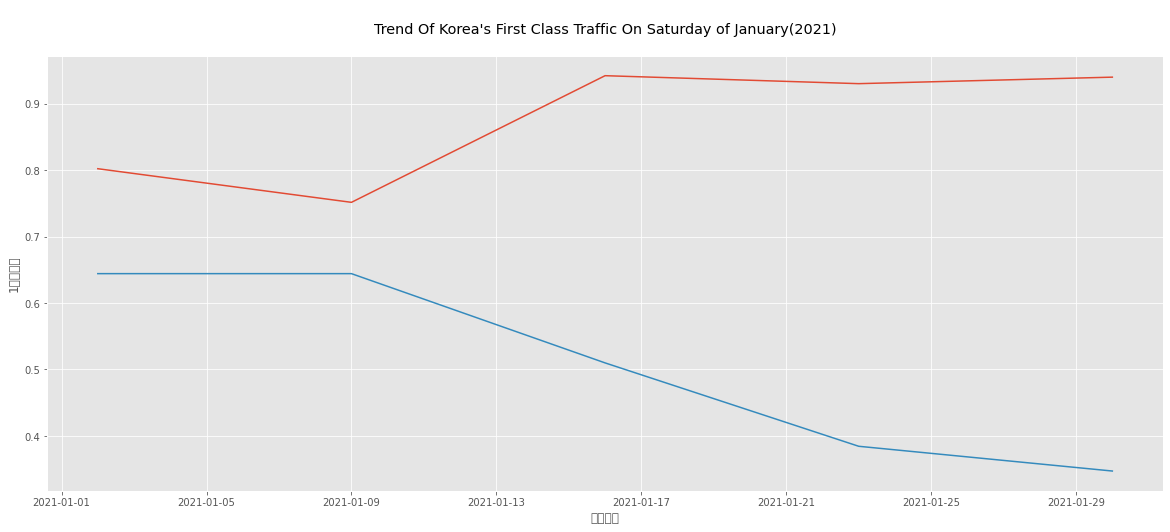

In [519]:
#2021 1종 교통량(대부분의 자가용) 1월 토요일 분석
#주황색이 교통량, 파란색이 코로나
plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Saturday of January(2021)\n')
sns.lineplot(data=jan_traffic_data[(jan_traffic_data.day_of_week=='SAT')], x='집계일자', y='1종교통량')
sns.lineplot(data=jan_covid_data_new[(jan_covid_data_new.day_of_week=='SAT')], x='stateDt', y='daily_decideCnt')


<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Saturday of February(2020)\n"}, xlabel='집계일자', ylabel='1종교통량'>

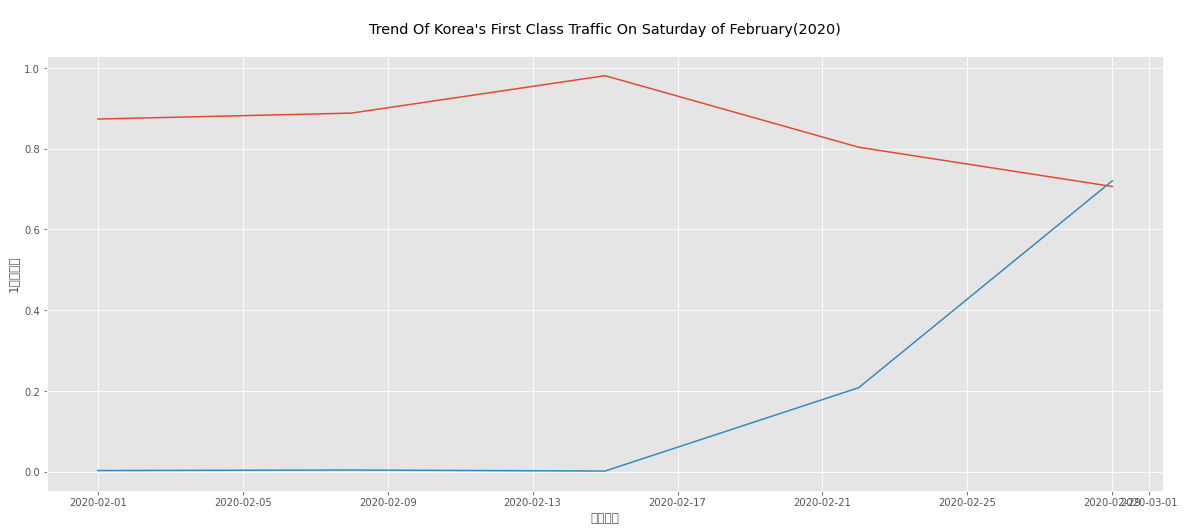

In [520]:
#2020 1종 교통량(대부분의 자가용) 2월 토요일 분석
#주황색이 교통량, 파란색이 코로나
plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Saturday of February(2020)\n')
sns.lineplot(data=feb_traffic_data[(feb_traffic_data.day_of_week=='SAT')], x='집계일자', y='1종교통량')
sns.lineplot(data=feb_covid_data_new[(feb_covid_data_new.day_of_week=='SAT')], x='stateDt', y='daily_decideCnt')

<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Saturday of February(2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

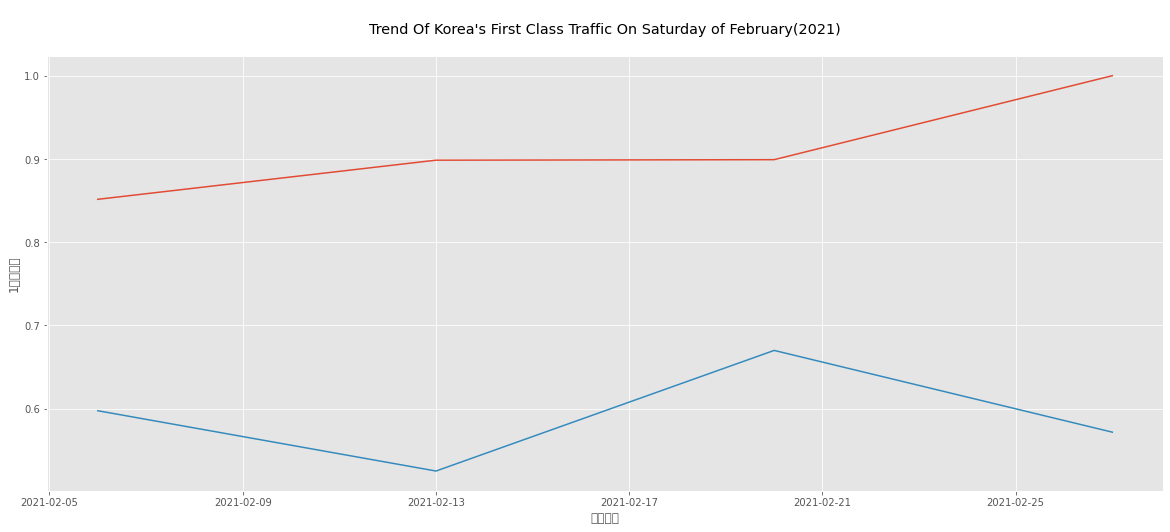

In [521]:
#2021 1종 교통량(대부분의 자가용) 2월 토요일 분석
#주황색이 교통량, 파란색이 코로나
plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Saturday of February(2021)\n')
sns.lineplot(data=lastfeb_traffic_data[(lastfeb_traffic_data.day_of_week=='SAT')], x='집계일자', y='1종교통량')
sns.lineplot(data=lastfeb_covid_data_n[(lastfeb_covid_data_n.day_of_week=='SAT')], x='stateDt', y='daily_decideCnt')

<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Sunday of January(2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

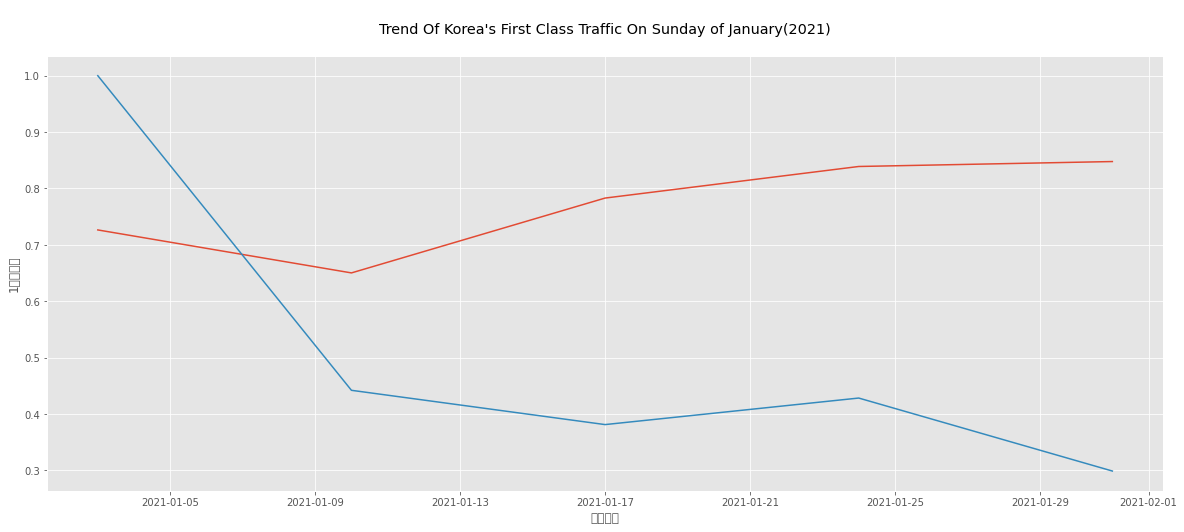

In [522]:
#2021 1종 교통량(대부분의 자가용) 1월 일요일 분석
#주황색이 교통량, 파란색이 코로나
plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Sunday of January(2021)\n')
sns.lineplot(data=jan_traffic_data[(jan_traffic_data.day_of_week=='SUN')], x='집계일자', y='1종교통량')
sns.lineplot(data=jan_covid_data_new[(jan_covid_data_new.day_of_week=='SUN')], x='stateDt', y='daily_decideCnt')


<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Sunday of February(2020)\n"}, xlabel='집계일자', ylabel='1종교통량'>

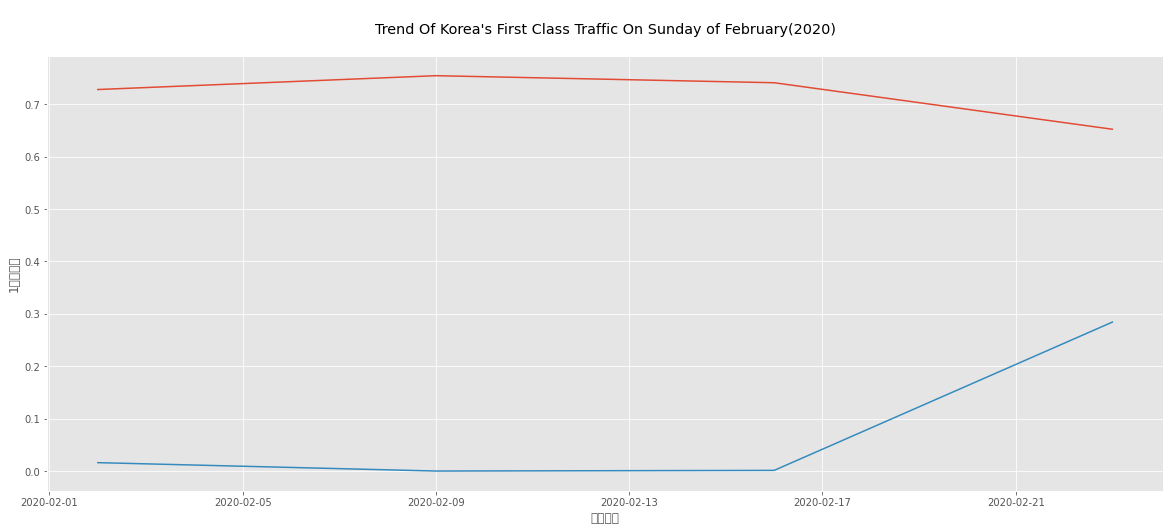

In [523]:
#2020 1종 교통량(대부분의 자가용) 2월 일요일 분석
#주황색이 교통량, 파란색이 코로나
plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Sunday of February(2020)\n')
sns.lineplot(data=feb_traffic_data[(feb_traffic_data.day_of_week=='SUN')], x='집계일자', y='1종교통량')
sns.lineplot(data=feb_covid_data_new[(feb_covid_data_new.day_of_week=='SUN')], x='stateDt', y='daily_decideCnt')

<AxesSubplot:title={'center':"\nTrend Of Korea's First Class Traffic On Sunday of February(2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

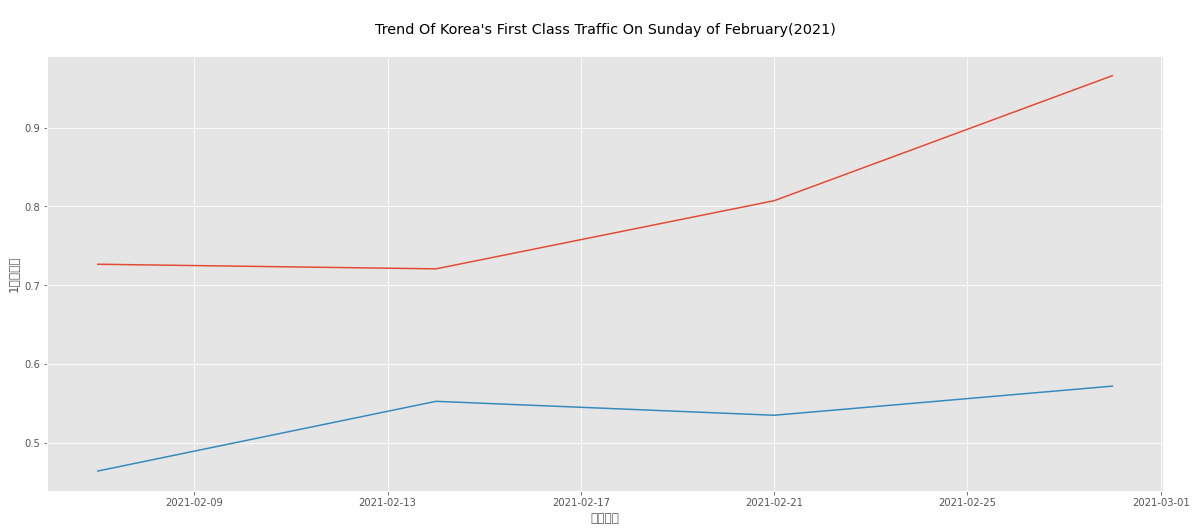

In [524]:
#2021 1종 교통량(대부분의 자가용) 2월 일요일 분석
#주황색이 교통량, 파란색이 코로나
plt.figure(figsize=(20,8)) 
plt.title('\nTrend Of Korea\'s First Class Traffic On Sunday of February(2021)\n')
sns.lineplot(data=lastfeb_traffic_data[(lastfeb_traffic_data.day_of_week=='SUN')], x='집계일자', y='1종교통량')
sns.lineplot(data=lastfeb_covid_data_n[(lastfeb_covid_data_n.day_of_week=='SUN')], x='stateDt', y='daily_decideCnt')